<h2 align="center">点击下列图标在线运行HanLP</h2>
<div align="center">
	<a href="https://colab.research.google.com/github/hankcs/HanLP/blob/doc-zh/plugins/hanlp_demo/hanlp_demo/zh/amr_restful.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
	<a href="https://mybinder.org/v2/gh/hankcs/HanLP/doc-zh?filepath=plugins%2Fhanlp_demo%2Fhanlp_demo%2Fzh%2Famr_restful.ipynb" target="_blank"><img src="https://mybinder.org/badge_logo.svg" alt="Open In Binder"/></a>
</div>

## 安装

无论是Windows、Linux还是macOS，HanLP的安装只需一句话搞定：

In [ ]:
!pip install hanlp_restful -U

## 创建客户端

In [1]:
from hanlp_restful import HanLPClient
HanLP = HanLPClient('https://www.hanlp.com/api', auth=None, language='zh') # auth不填则匿名，zh中文，mul多语种

#### 申请秘钥
由于服务器算力有限，匿名用户每分钟限2次调用。如果你需要更多调用次数，[建议申请免费公益API秘钥auth](https://bbs.hanlp.com/t/hanlp2-1-restful-api/53)。

## 抽象意义表示
### 中文
抽象意义表示任务的输入为一段文本或已分词完毕的句子：

In [2]:
graphs = HanLP.abstract_meaning_representation('男孩希望女孩相信他。')
len(graphs)

1

返回值为每个句子相应的AMR图的Meaning Representation格式：

In [3]:
graph = graphs[0]
graph

{'id': '0',
 'input': '男孩 希望 女孩 相信 他 。',
 'nodes': [{'id': 0,
   'label': '男孩',
   'anchors': [{'from': 0, 'to': 2}, {'from': 12, 'to': 13}]},
  {'id': 1, 'label': '希望-01', 'anchors': [{'from': 3, 'to': 5}]},
  {'id': 2, 'label': '女孩', 'anchors': [{'from': 6, 'to': 8}]},
  {'id': 3, 'label': '相信-01', 'anchors': [{'from': 9, 'to': 11}]}],
 'edges': [{'source': 1, 'target': 3, 'label': 'arg1'},
  {'source': 1, 'target': 0, 'label': 'arg0'},
  {'source': 3, 'target': 2, 'label': 'arg0'},
  {'source': 3, 'target': 0, 'label': 'arg1'}],
 'tops': [1],
 'framework': 'amr'}

注意上面“男孩”有2个anchor，分别对应“男孩”和“他”。也就是说，MR格式其实包含了指代消解的结果。

### 可视化
指定`visualization='svg'`即可得到矢量图可视化。

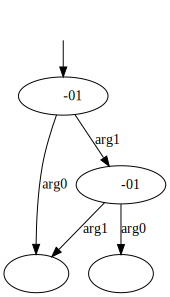

In [4]:
from IPython.display import SVG, display

def show_svg(g):
    display(SVG(data=g['svg']))
    
graph = HanLP.abstract_meaning_representation('男孩希望女孩相信他。', visualization='svg')[0]
show_svg(graph)

### 多语种支持
除了中文外，支持的语言列表：

#### 英文
目前，HanLP服务器还支持英文AMR：

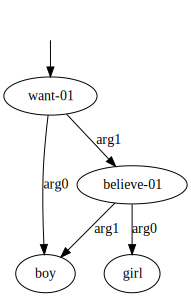

In [5]:
graph = HanLP.abstract_meaning_representation('The boy wants the girl to believe him.',
                                      language='en', visualization='svg')[0]
show_svg(graph)

用户可以通过指定`language`参数来实现英文抽象意义表示的分析：

In [6]:
HanLP.abstract_meaning_representation(tokens=[['The', 'boy', 'wants', 'the', 'girl', 'to', 'believe', 'him', '.']], 
                                            language='en')[0]

{'id': '0',
 'input': 'The boy wants the girl to believe him .',
 'nodes': [{'id': 0, 'label': 'boy'},
  {'id': 1, 'label': 'wants-01'},
  {'id': 2, 'label': 'girl'},
  {'id': 3, 'label': 'believe-01'}],
 'edges': [{'source': 3, 'target': 0, 'label': 'arg1'},
  {'source': 1, 'target': 3, 'label': 'arg1'},
  {'source': 3, 'target': 2, 'label': 'arg0'},
  {'source': 1, 'target': 0, 'label': 'arg0'}],
 'tops': [1],
 'framework': 'amr'}